In [21]:
#packages
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
"""functions used 
d - no. of cols (features)
n - number of rows
s - number of non-zero entries (to be varied)
"""
def sketch_matrix(m, n_columns, non_zero_entries):
    #matrix with all zero entries
    S = np.zeros((m, n_columns))
    scaling_factor = 1 / np.sqrt(non_zero_entries)
    #loop through each columns to edit the non zero entries in
    for col in range(n_columns):
        # Randomly select position of non_zero entries
        nz_positions = np.random.choice(m, non_zero_entries, replace=False)
        
        # Randomly assign values of either 1 or -1 to these positions
        values = np.random.choice([1, -1], non_zero_entries)* scaling_factor
        
        # Assign the values to the selected positions in the column
        for idx, value in zip(nz_positions, values):
            S[idx, col] = value
    
    return S

In [23]:
#function to find min max
def find_min_max(S, U):
    SU = S @ U
    smin = np.min(SU)
    smax = np.max(SU)
    return smin, smax

#svd of matrix
def compute_svd(matrix):
    # SVD computation only keep the singular values
    _, s, _ = np.linalg.svd(matrix, full_matrices=False)
    return np.min(s), np.max(s)

In [24]:
sketch_matrix(10,5,3)

array([[-0.57735027, -0.57735027, -0.57735027,  0.        ,  0.57735027],
       [ 0.        ,  0.        ,  0.57735027,  0.57735027,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.57735027,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.57735027,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.57735027],
       [ 0.        ,  0.        , -0.57735027,  0.        ,  0.        ],
       [ 0.        , -0.57735027,  0.        ,  0.        ,  0.        ],
       [ 0.57735027,  0.        ,  0.        , -0.57735027,  0.        ],
       [-0.57735027,  0.        ,  0.        ,  0.        , -0.57735027]])

In [25]:
#initialise
#n_row is the row of U and dimension of S
n_rows = 1000    
d = 100          
n_sketches = 20
m_values = list(range(100, 1001, 50))

#U matrix
U = np.random.randn(n_rows, d)



In [26]:
#simulation
results = []
for m in m_values:
    s_values = list(range(5, m + 1, 5))
    for s in s_values:
        #temp storing of results
        min_vals = []
        max_vals = []
        total_time = 0
        # Generate multiple sketches for the given (m, s)
        for i in range(n_sketches):
            start_time = time.time()
            # Generate sketch matrix S
            S = sketch_matrix(m, n_rows, s)
            SU = S @ U
            # Compute min and max svd of SU
            min_svd, max_svd = compute_svd(SU)
            min_vals.append(min_svd)
            max_vals.append(max_svd)
            end_time = time.time()  # End timing
            total_time += (end_time - start_time)
            
        results.append({
            "m": m,
            "s": s,
            "min_svd_list": min_vals,
            "max_svd_list": max_vals,
            "avg_time": total_time / n_sketches
        })

#dataframe to store results
results_df = pd.DataFrame(results)

In [27]:
results_df['min_svd_list_length'] = results_df['min_svd_list'].apply(len)
results_df

,m,s,min_svd_list,max_svd_list,avg_time,min_svd_list_length
0,100,5,"[0.3341785137705956, 0.17389020515502546, 0.07...","[63.53143589228892, 64.73254773925102, 64.7812...",0.033113,20
1,100,10,"[0.06705336691207293, 0.46545994426936366, 0.4...","[66.29593304986152, 64.18865206862272, 64.1102...",0.032383,20
2,100,15,"[0.27066480676893934, 0.07712144768769746, 0.0...","[65.84543832058743, 64.11314920606522, 64.7919...",0.032518,20
3,100,20,"[0.1058059980692764, 0.330752730978742, 0.1086...","[66.03421938532857, 66.03386400917465, 64.7649...",0.034333,20
4,100,25,"[0.2997515806508581, 0.17025757910770953, 0.16...","[64.28084841415316, 63.96183086234761, 63.0461...",0.034814,20
...,...,...,...,...,...,...
2085,1000,980,"[18.816902392204383, 18.741832459657108, 18.57...","[45.399344892018334, 45.75643645135799, 45.517...",0.256820,20
2086,1000,985,"[18.888534461812853, 18.673736009910026, 18.79...","[45.23692715227479, 45.42451501274714, 46.0677...",0.258192,20
2087,1000,990,"[18.813190018827267, 18.935056522404786, 18.47...","[45.465847412641544, 45.74831288473093, 46.065...",0.269320,20
2088,1000,995,"[18.49910443748861, 18.618110194400597, 18.727...","[45.16717885393283, 45.591697997537416, 45.543...",0.261507,20


In [29]:
results_df['avg_min_svd'] = results_df['min_svd_list'].apply(np.mean)

# Calculate the average of the max_svd_list for each row
results_df['avg_max_svd'] = results_df['max_svd_list'].apply(np.mean)
results_df

,m,s,min_svd_list,max_svd_list,avg_time,min_svd_list_length,avg_min_svd,avg_max_svd
0,100,5,"[0.3341785137705956, 0.17389020515502546, 0.07...","[63.53143589228892, 64.73254773925102, 64.7812...",0.033113,20,0.162248,64.842919
1,100,10,"[0.06705336691207293, 0.46545994426936366, 0.4...","[66.29593304986152, 64.18865206862272, 64.1102...",0.032383,20,0.222463,64.781029
2,100,15,"[0.27066480676893934, 0.07712144768769746, 0.0...","[65.84543832058743, 64.11314920606522, 64.7919...",0.032518,20,0.153589,63.797957
3,100,20,"[0.1058059980692764, 0.330752730978742, 0.1086...","[66.03421938532857, 66.03386400917465, 64.7649...",0.034333,20,0.155217,64.523346
4,100,25,"[0.2997515806508581, 0.17025757910770953, 0.16...","[64.28084841415316, 63.96183086234761, 63.0461...",0.034814,20,0.200453,64.044618
...,...,...,...,...,...,...,...,...
2085,1000,980,"[18.816902392204383, 18.741832459657108, 18.57...","[45.399344892018334, 45.75643645135799, 45.517...",0.256820,20,18.548268,45.831568
2086,1000,985,"[18.888534461812853, 18.673736009910026, 18.79...","[45.23692715227479, 45.42451501274714, 46.0677...",0.258192,20,18.619261,45.653267
2087,1000,990,"[18.813190018827267, 18.935056522404786, 18.47...","[45.465847412641544, 45.74831288473093, 46.065...",0.269320,20,18.698198,45.833659
2088,1000,995,"[18.49910443748861, 18.618110194400597, 18.727...","[45.16717885393283, 45.591697997537416, 45.543...",0.261507,20,18.772831,45.487632


In [31]:
results_df['max_min_ratio'] = results_df['avg_max_svd']/results_df['avg_min_svd']
results_df


,m,s,min_svd_list,max_svd_list,avg_time,min_svd_list_length,avg_min_svd,avg_max_svd,max_min_ratio
0,100,5,"[0.3341785137705956, 0.17389020515502546, 0.07...","[63.53143589228892, 64.73254773925102, 64.7812...",0.033113,20,0.162248,64.842919,399.654339
1,100,10,"[0.06705336691207293, 0.46545994426936366, 0.4...","[66.29593304986152, 64.18865206862272, 64.1102...",0.032383,20,0.222463,64.781029,291.199312
2,100,15,"[0.27066480676893934, 0.07712144768769746, 0.0...","[65.84543832058743, 64.11314920606522, 64.7919...",0.032518,20,0.153589,63.797957,415.380055
3,100,20,"[0.1058059980692764, 0.330752730978742, 0.1086...","[66.03421938532857, 66.03386400917465, 64.7649...",0.034333,20,0.155217,64.523346,415.697987
4,100,25,"[0.2997515806508581, 0.17025757910770953, 0.16...","[64.28084841415316, 63.96183086234761, 63.0461...",0.034814,20,0.200453,64.044618,319.499142
...,...,...,...,...,...,...,...,...,...
2085,1000,980,"[18.816902392204383, 18.741832459657108, 18.57...","[45.399344892018334, 45.75643645135799, 45.517...",0.256820,20,18.548268,45.831568,2.470935
2086,1000,985,"[18.888534461812853, 18.673736009910026, 18.79...","[45.23692715227479, 45.42451501274714, 46.0677...",0.258192,20,18.619261,45.653267,2.451938
2087,1000,990,"[18.813190018827267, 18.935056522404786, 18.47...","[45.465847412641544, 45.74831288473093, 46.065...",0.269320,20,18.698198,45.833659,2.451234
2088,1000,995,"[18.49910443748861, 18.618110194400597, 18.727...","[45.16717885393283, 45.591697997537416, 45.543...",0.261507,20,18.772831,45.487632,2.423057


In [32]:
results_df.to_csv("implementation results.csv", index=False)

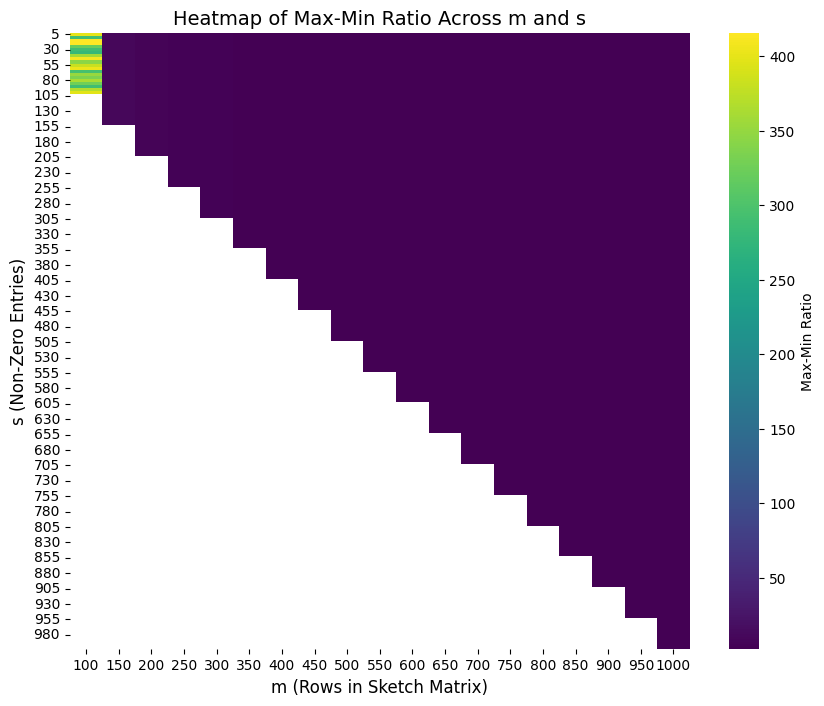

In [42]:
pivot_table = results_df.pivot(index="s", columns="m", values="max_min_ratio")

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap="viridis", annot=False, cbar_kws={"label": "Max-Min Ratio"})

plt.title("Heatmap of Max-Min Ratio Across m and s", fontsize=14)
plt.xlabel("m (Rows in Sketch Matrix)", fontsize=12)
plt.ylabel("s (Non-Zero Entries)", fontsize=12)

plt.show()

In [40]:
sorted_results = results_df.sort_values(by="max_min_ratio", ascending=True)
sorted_results_cleaned = sorted_results.drop(columns=["min_svd_list", "max_svd_list"])

# Select the top few rows with the smallest max_min_ratio
top_few_rows = sorted_results_cleaned.head(5)

top_few_rows

,m,s,avg_time,min_svd_list_length,avg_min_svd,avg_max_svd,max_min_ratio
2088,1000,995,0.261507,20,18.772831,45.487632,2.423057
1973,1000,420,0.154606,20,18.784610,45.525744,2.423566
2023,1000,670,0.206100,20,18.748343,45.549444,2.429518
1939,1000,250,0.120844,20,18.755563,45.574524,2.429920
1911,1000,110,0.097502,20,18.808409,45.727006,2.431200


In [44]:
#rows where s = m
temp = results_df[results_df["s"] == results_df["m"]]
temp = temp.drop(columns=["min_svd_list", "max_svd_list"])

temp

,m,s,avg_time,min_svd_list_length,avg_min_svd,avg_max_svd,max_min_ratio
19,100,100,0.046571,20,0.161748,64.346166,397.817427
49,150,150,0.070080,20,5.977589,59.066950,9.881400
89,200,200,0.081537,20,8.820922,56.407026,6.394686
139,250,250,0.094998,20,11.183144,53.883050,4.818238
199,300,300,0.108455,20,12.649263,52.263612,4.131752
269,350,350,0.122334,20,13.825524,51.261788,3.707764
349,400,400,0.134991,20,14.500955,50.501690,3.482646
439,450,450,0.143624,20,15.357429,49.550196,3.226464
539,500,500,0.169278,20,15.753423,48.801734,3.097849
649,550,550,0.165957,20,16.292950,48.456342,2.974068
